I run this note book on google colab..


conect to my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import libraries** 

In [ ]:
import skimage
from skimage import data
import numpy as np
import pandas as pd
from skimage import filters
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from skimage.transform import resize
import sklearn.metrics 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import datasets, metrics, model_selection
import os
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib as mpl

from sklearn.metrics import mean_squared_error

mpl.style.use('seaborn')


# Import the Keras API from Tensorflow

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D , Dropout,LeakyReLU,BatchNormalization
# from tensorflow.keras import backend as K

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

### ReadData
then resize it in to 128*128\
then label images

In [ ]:
def Read(path , lab):
    images =io.imread_collection(path)
    data = []
    labels = []
    for img in images:  
        res = resize(img,(128,128),anti_aliasing=True)
        data.append(res)
        labels.append(lab)

    return data ,labels

### Train Data

In [ ]:
train1,label1 =  Read("/content/drive/MyDrive/training/1/*.png" ,"0")
train2,label2 =  Read("/content/drive/MyDrive/training/2/*.png" , "1")
train3,label3 =  Read("/content/drive/MyDrive/training/3/*.png" , "2")
train4,label4 =  Read("/content/drive/MyDrive/training/4/*.png" , "3")
train6,label6 =  Read("/content/drive/MyDrive/training/6/*.png" , "4")

In [ ]:
X_train = train1 + train2+train3+train4+train6
Y_train = label1+label2+label3+label4+label6


X_train =np.array(X_train)
Y_train =np.array(Y_train)

### Test Data

In [ ]:
test1,labe1 =  Read("/content/drive/MyDrive/testing/1/*.png" ,"0")
test2,labe2 =  Read("/content/drive/MyDrive/testing/2/*.png" , "1")
test3,labe3 =  Read("/content/drive/MyDrive/testing/3/*.png" , "2")
test4,labe4 =  Read("/content/drive/MyDrive/testing/4/*.png" , "3")
test6,labe6 =  Read("/content/drive/MyDrive/testing/6/*.png" , "4")

In [ ]:
X_test = test1 + test2+test3+test4+test6
Y_test = labe1+labe2+labe3+labe4+labe6

X_test =np.array(X_test)
Y_test =np.array(Y_test)

### Split Train in to train and validation

In [ ]:
trainx, valx, trainy, valy = train_test_split(X_train, Y_train, test_size=0.4, stratify=Y_train, random_state=42)

convert in ti integer

In [ ]:
Y_test = np.array(Y_test).astype('int')
trainy = np.array(trainy).astype('int')
valy = np.array(valy).astype('int')

convert in to one hot encoding

In [ ]:
nClasses = 5

y_train_k = tensorflow.keras.utils.to_categorical(trainy, num_classes=nClasses)
y_val_k = tensorflow.keras.utils.to_categorical(valy, num_classes=nClasses)


# VGG-16
import model 

In [ ]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))



58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
vgg_model.layers[6]

# 3.1 Classification Network


use just first 2 block of Vgg then add Convolution Layer (128 with filter (3*3)filter) then use MaxPooling2D  repeat this step three time with different number and finish use flatten then dense (fully connected layer)

In [ ]:
from keras import Sequential

for layer in vgg_model.layers:
    layer.trainable = False

model = Sequential()

model = vgg_model.layers[6].output

x = model

x = Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3))(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)


In [ ]:
print(vgg_model_transfer.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

## Fit the model 
on train and validation

In [ ]:
batchSize = 30
nEpochs = 25
    
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001), 
                           metrics=['accuracy'])

history = vgg_model_transfer.fit(trainx, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(valx, y_val_k))


Epoch 1/25
18/18 [==============================] - 34s 109ms/step - loss: 3.8722 - accuracy: 0.2019 - val_loss: 2.6000 - val_accuracy: 0.2278
Epoch 2/25
18/18 [==============================] - 2s 97ms/step - loss: 1.4624 - accuracy: 0.4241 - val_loss: 1.6918 - val_accuracy: 0.2861
Epoch 3/25
18/18 [==============================] - 2s 97ms/step - loss: 0.9682 - accuracy: 0.6352 - val_loss: 1.6597 - val_accuracy: 0.3500
Epoch 4/25
18/18 [==============================] - 2s 89ms/step - loss: 0.6605 - accuracy: 0.8315 - val_loss: 1.5910 - val_accuracy: 0.3722
Epoch 5/25
18/18 [==============================] - 2s 96ms/step - loss: 0.4700 - accuracy: 0.9148 - val_loss: 1.5295 - val_accuracy: 0.3750
Epoch 6/25
18/18 [==============================] - 2s 88ms/step - loss: 0.3357 - accuracy: 0.9519 - val_loss: 1.5679 - val_accuracy: 0.3972
Epoch 7/25
18/18 [==============================] - 2s 97ms/step - loss: 0.2650 - accuracy: 0.9796 - val_loss: 1.7273 - val_accuracy: 0.3306
Epoch 8/25


there is over fit the accuracy in the train equal one

## Test model  

              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.41      0.45      0.43        20
           2       0.07      0.05      0.06        20
           3       0.39      0.35      0.37        20
           4       0.38      0.50      0.43        20

    accuracy                           0.37       100
   macro avg       0.36      0.37      0.36       100
weighted avg       0.36      0.37      0.36       100


 Confusion matrix: 

[[10  6  3  1  0]
 [ 3  9  4  1  3]
 [ 5  6  1  3  5]
 [ 1  1  3  7  8]
 [ 0  0  4  6 10]]




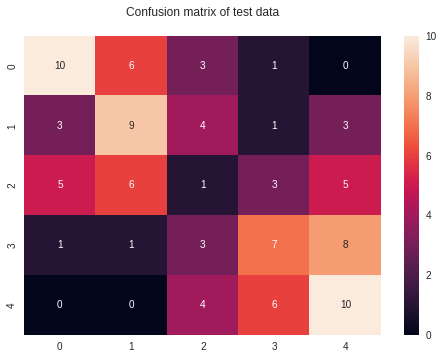

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)
print(classification_report(Y_test, y_predict))
conf_mx = confusion_matrix(Y_test, y_predict)
print('\n Confusion matrix: \n\n{0}'.format(conf_mx))
print('\n')
hm = sns.heatmap(conf_mx, annot = True)

hm.set(title = "Confusion matrix of test data\n")

plt.show()

# Training History Visualization 

accuracy and convolution matrix for train 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00       108

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540


 Confusion matrix: 

[[108   0   0   0   0]
 [  0 108   0   0   0]
 [  0   0 108   0   0]
 [  0   0   0 108   0]
 [  0   0   0   0 108]]




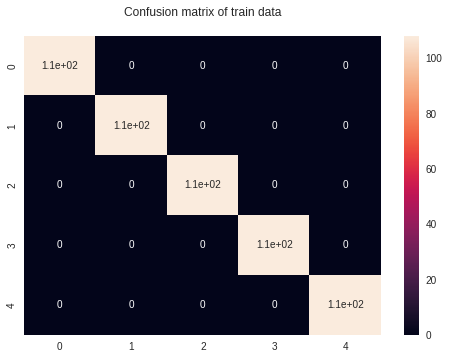

In [ ]:
y_pr = vgg_model_transfer.predict(trainx)
y_pred = y_pr.argmax(axis=-1)
print(classification_report(trainy, y_pred))
conf_mx = confusion_matrix(trainy, y_pred)
print('\n Confusion matrix: \n\n{0}'.format(conf_mx))
print('\n')
hm = sns.heatmap(conf_mx, annot = True)

hm.set(title = "Confusion matrix of train data\n")

plt.show()

accuracy and convolution matrix for test

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        72
           1       0.61      0.51      0.56        72
           2       0.40      0.38      0.39        72
           3       0.34      0.26      0.30        72
           4       0.38      0.51      0.44        72

    accuracy                           0.48       360
   macro avg       0.48      0.48      0.48       360
weighted avg       0.48      0.48      0.48       360


 Confusion matrix: 

[[53  2  7  2  8]
 [14 37  8  7  6]
 [ 5  9 27 14 17]
 [ 5  5 14 19 29]
 [ 2  8 11 14 37]]




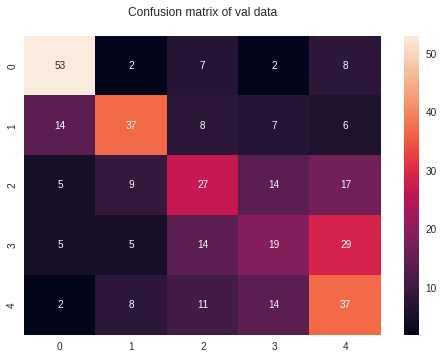

In [ ]:
y_prtest = vgg_model_transfer.predict(valx)
y_predtest = y_prtest.argmax(axis=-1)
print(classification_report(valy, y_predtest))
conf_mx = confusion_matrix(valy, y_predtest)
print('\n Confusion matrix: \n\n{0}'.format(conf_mx))
print('\n')
hm = sns.heatmap(conf_mx, annot = True)

hm.set(title = "Confusion matrix of val data\n")

plt.show()

**Accuracy**
Source: Keras manual

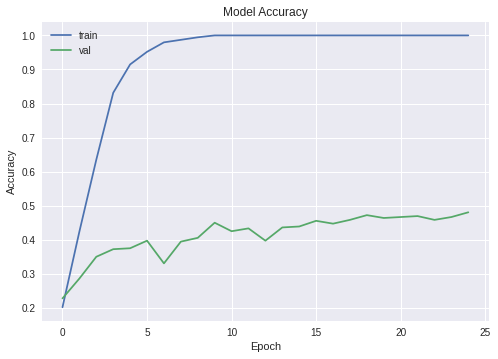

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


we can see there is difference (gap) between curve of training and validation
and the train is reached to one so the model is overfitting

**Loss**
Source: Keras manual

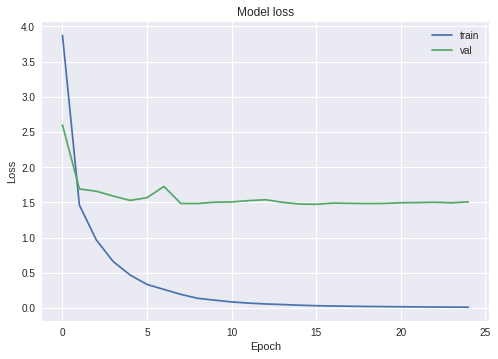

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()



we can see that the curve of train and validate stop updating after 10 Epochs or less than that and it can't reach to the minimum

# 3.2 Regression Network

In [ ]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [ ]:
# print(vgg_model.summary())

use same as Classification but edit in last layer of dense use Dense(1)
then LeakyReLU as activation function

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.layers[6].output

x = Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3))(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(256, (3,3), activation='relu' ,padding='same')(x)
x = MaxPooling2D(2, 2)(x)


x = Conv2D(256, (3,3), activation='relu' ,padding='same')(x)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dense(16, activation='relu')(x)

x = Dense(1)(x)
x= LeakyReLU(alpha=0.01)(x)

from tensorflow.keras.models import Model
vgg_model_regression = Model(inputs=vgg_model.input, outputs=x)


In [ ]:
print(vgg_model_regression.summary())

In [ ]:
batchSize = 32
nEpochs = 25

    
vgg_model_regression.compile(loss='MeanSquaredError', 
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))


historyreg = vgg_model_regression.fit(trainx, trainy, batch_size=batchSize, epochs=nEpochs, verbose=1,validation_data=(valx, valy))


Epoch 1/25
17/17 [==============================] - 3s 114ms/step - loss: 11.7005 - val_loss: 6.1195
Epoch 2/25
17/17 [==============================] - 2s 91ms/step - loss: 6.1077 - val_loss: 6.0900
Epoch 3/25
17/17 [==============================] - 2s 92ms/step - loss: 6.0577 - val_loss: 6.0289
Epoch 4/25
17/17 [==============================] - 2s 92ms/step - loss: 6.0045 - val_loss: 5.8841
Epoch 5/25
17/17 [==============================] - 2s 91ms/step - loss: 3.3522 - val_loss: 2.6135
Epoch 6/25
17/17 [==============================] - 2s 91ms/step - loss: 2.1674 - val_loss: 1.8897
Epoch 7/25
17/17 [==============================] - 2s 92ms/step - loss: 1.7592 - val_loss: 1.8273
Epoch 8/25
17/17 [==============================] - 1s 90ms/step - loss: 1.5399 - val_loss: 1.7601
Epoch 9/25
17/17 [==============================] - 2s 90ms/step - loss: 1.3822 - val_loss: 1.6117
Epoch 10/25
17/17 [==============================] - 2s 90ms/step - loss: 1.2796 - val_loss: 1.5667
Epoch 1

In [ ]:
y_predictreg = vgg_model_regression.predict(X_test)
print("mean_squared_error for test ",mean_squared_error(Y_test, y_predictreg))

#################################

testy_predictreg = vgg_model_regression.predict(trainx)
print("mean_squared_error for train ",mean_squared_error(trainy, testy_predictreg))

##################################

y_predictregtest = vgg_model_regression.predict(valx)
print("mean_squared_error for Val ",mean_squared_error(valy, y_predictregtest))


mean_squared_error for test  1.041972770089563
mean_squared_error for train  0.14331725552603175
mean_squared_error for Val  1.159947872483744


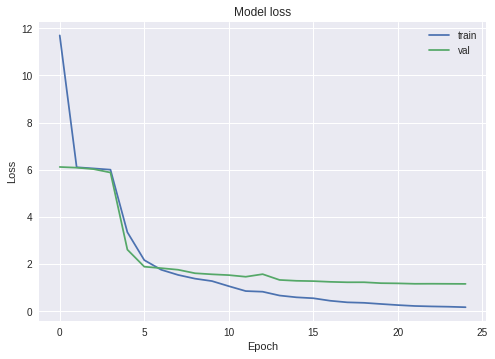

In [ ]:
plt.plot(historyreg.history['loss'])
plt.plot(historyreg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()



in regeresion I try to use more than activation function in the last dense and when i use relu the ouput was constant number and not to improve so i use LeakyReLU, the model was improved little. 
from the curve we can see that the mode also can't reach the minimum loss and still there overfitting.


## 3.3 Discussion

The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with your networks in Question 3.1 and Question 3.2.

yes the size of data is very small so the moddel is overfitting and the accuracy for the test is low and you can see comments on each graph


# [4] *Improving the Model*


### 4.1 Regularization

we select **Classification** model to use on it regularization

---
in regularization we use BatchNormalization after each Conv2D  and add new Conv2D then use Dropout after flatten.





In [ ]:

for layer in vgg_model.layers:
    layer.trainable = False

reg = vgg_model.layers[6].output
reg = Conv2D(128, (3,3), activation='relu', padding='same',input_shape=(128, 128, 3))(reg)
reg = BatchNormalization()(reg)
reg = MaxPooling2D(2, 2)(reg)

reg = Conv2D(256, (3,3), activation='relu', padding='same')(reg)
reg = BatchNormalization()(reg)
reg = MaxPooling2D(2, 2)(reg)


reg = Conv2D(256, (3,3), activation='relu', padding='same')(reg)
reg = BatchNormalization()(reg)
reg = MaxPooling2D(2, 2)(reg)

reg = Conv2D(512, (3,3), activation='relu', padding='same')(reg)
reg = BatchNormalization()(reg)
reg = MaxPooling2D(2, 2)(reg)




reg = Flatten()(reg)

# reg = Dense(28, activation='softmax')(reg)

reg = Dropout(0.5)(reg)

reg = Dense(5, activation='softmax')(reg)

from tensorflow.keras.models import Model
vgg_model_reg = Model(inputs=vgg_model.input, outputs=reg)

In [ ]:
batchSize = 30
nEpochs = 50

    

vgg_model_reg.compile(loss='categorical_crossentropy', 
                           optimizer=tensorflow.keras.optimizers.Adam(lr=0.00001), 
                           metrics=['accuracy'])


historyreg = vgg_model_reg.fit(trainx, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(valx, y_val_k))


Epoch 1/50
18/18 [==============================] - 3s 133ms/step - loss: 3.7013 - accuracy: 0.2130 - val_loss: 2.0096 - val_accuracy: 0.1667
Epoch 2/50
18/18 [==============================] - 2s 103ms/step - loss: 3.1289 - accuracy: 0.2426 - val_loss: 1.8282 - val_accuracy: 0.2000
Epoch 3/50
18/18 [==============================] - 2s 97ms/step - loss: 2.6707 - accuracy: 0.3204 - val_loss: 1.7419 - val_accuracy: 0.2083
Epoch 4/50
18/18 [==============================] - 2s 97ms/step - loss: 2.4537 - accuracy: 0.3426 - val_loss: 1.7325 - val_accuracy: 0.2389
Epoch 5/50
18/18 [==============================] - 2s 98ms/step - loss: 2.0013 - accuracy: 0.3944 - val_loss: 1.7138 - val_accuracy: 0.2278
Epoch 6/50
18/18 [==============================] - 2s 96ms/step - loss: 1.8812 - accuracy: 0.4389 - val_loss: 1.6995 - val_accuracy: 0.2333
Epoch 7/50
18/18 [==============================] - 2s 104ms/step - loss: 1.7480 - accuracy: 0.4778 - val_loss: 1.7102 - val_accuracy: 0.2333
Epoch 8/50

              precision    recall  f1-score   support

           0       0.36      0.45      0.40        20
           1       0.35      0.35      0.35        20
           2       0.48      0.50      0.49        20
           3       0.14      0.10      0.12        20
           4       0.45      0.45      0.45        20

    accuracy                           0.37       100
   macro avg       0.36      0.37      0.36       100
weighted avg       0.36      0.37      0.36       100


 Confusion matrix: 

[[53  2  7  2  8]
 [14 37  8  7  6]
 [ 5  9 27 14 17]
 [ 5  5 14 19 29]
 [ 2  8 11 14 37]]




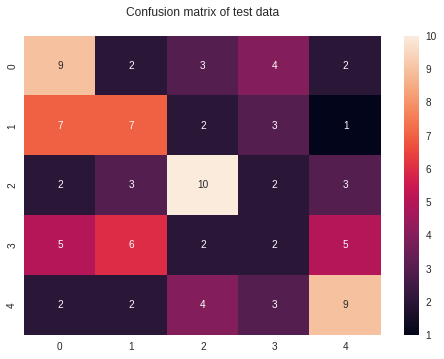

In [ ]:
y_predict_reg = vgg_model_reg.predict(X_test)
y_predictreg = y_predict_reg.argmax(axis=-1)
print(classification_report(Y_test, y_predictreg))
conf_mxreg = confusion_matrix(Y_test, y_predictreg)
print('\n Confusion matrix: \n\n{0}'.format(conf_mx))
print('\n')
hm = sns.heatmap(conf_mxreg, annot = True)

hm.set(title = "Confusion matrix of test data\n")

plt.show()

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.98      0.97      0.98       108
           2       0.96      0.92      0.94       108
           3       0.97      0.90      0.93       108
           4       0.86      1.00      0.93       108

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540


 Confusion matrix: 

[[103   2   2   0   1]
 [  0 105   0   0   3]
 [  1   0  99   3   5]
 [  1   0   2  97   8]
 [  0   0   0   0 108]]




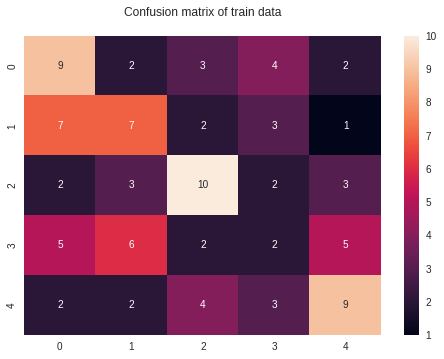

In [ ]:
trainy_predict_reg = vgg_model_reg.predict(trainx)
trainy_predictreg = trainy_predict_reg.argmax(axis=-1)
print(classification_report(trainy, trainy_predictreg))
trainconf_mxreg = confusion_matrix(trainy, trainy_predictreg)
print('\n Confusion matrix: \n\n{0}'.format(trainconf_mxreg))
print('\n')
hm = sns.heatmap(conf_mxreg, annot = True)

hm.set(title = "Confusion matrix of train data\n")

plt.show()

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        72
           1       0.51      0.43      0.47        72
           2       0.44      0.40      0.42        72
           3       0.36      0.28      0.31        72
           4       0.54      0.78      0.64        72

    accuracy                           0.52       360
   macro avg       0.51      0.52      0.51       360
weighted avg       0.51      0.52      0.51       360


 Confusion matrix: 

[[51  7 10  0  4]
 [13 31 14 11  3]
 [ 6 11 29 16 10]
 [ 3 10  9 20 30]
 [ 2  2  4  8 56]]




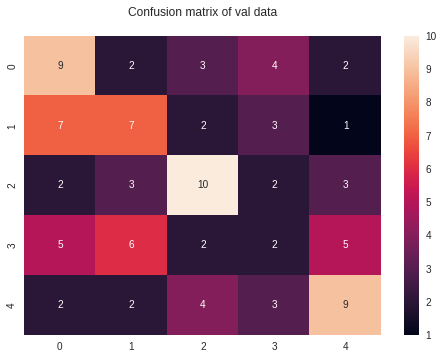

In [ ]:
valy_predict_reg = vgg_model_reg.predict(valx)
valy_predictreg = valy_predict_reg.argmax(axis=-1)
print(classification_report(valy, valy_predictreg))
valconf_mxreg = confusion_matrix(valy, valy_predictreg)
print('\n Confusion matrix: \n\n{0}'.format(valconf_mxreg))
print('\n')
hm = sns.heatmap(conf_mxreg, annot = True)

hm.set(title = "Confusion matrix of val data\n")

plt.show()

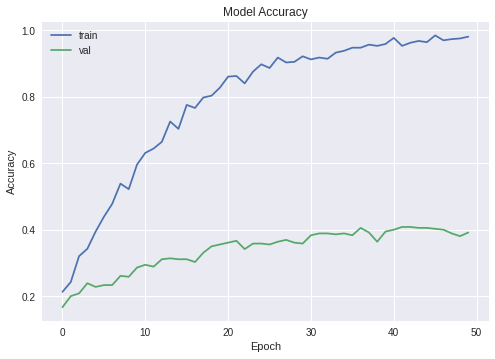

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in historyreg.history :
    k = 'accuracy'    

if 'acc' in historyreg.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(historyreg.history[k])
    plt.plot(historyreg.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


in regularization there is still over fitting but best than the first classification.

the accuracy not high improved 

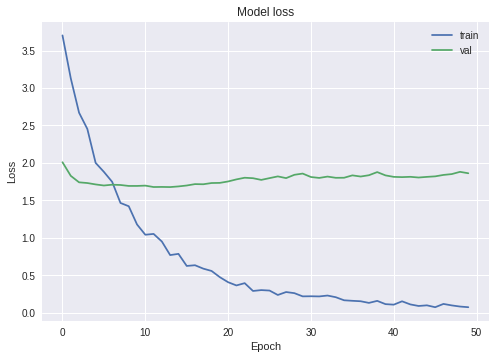

In [ ]:
plt.plot(historyreg.history['loss'])
plt.plot(historyreg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()



the rate of train loss is decrease so this is good but there is no improve in validation.there is overfitting

#**5 ] Data Augmentation**

we generate sample of data with different feature with rotation, shift,zoom and flip

In [ ]:
training_datagen = ImageDataGenerator(
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

training_datagen.fit(X_train)

In [ ]:
train_generator = training_datagen.flow(
	trainx,y_train_k,
  batch_size=16
)

In [ ]:
modelaug = vgg_model_reg.fit(
        train_generator,
        steps_per_epoch=30 ,
        epochs=50,
        validation_data=(valx, y_val_k),
        validation_steps=30 )
# model.save_weights('first_try.h5')

Epoch 1/50
30/30 [==============================] - 7s 156ms/step - loss: 2.7082 - accuracy: 0.3333 - val_loss: 1.8188 - val_accuracy: 0.4056
Epoch 2/50
30/30 [==============================] - 3s 109ms/step - loss: 2.7530 - accuracy: 0.3235 - val_loss: 2.1282 - val_accuracy: 0.4167
Epoch 3/50
30/30 [==============================] - 3s 109ms/step - loss: 2.7957 - accuracy: 0.3361 - val_loss: 2.0053 - val_accuracy: 0.3806
Epoch 4/50
30/30 [==============================] - 4s 129ms/step - loss: 2.3174 - accuracy: 0.3938 - val_loss: 1.8858 - val_accuracy: 0.4167
Epoch 5/50
30/30 [==============================] - 3s 108ms/step - loss: 2.3786 - accuracy: 0.3782 - val_loss: 1.9090 - val_accuracy: 0.4056
Epoch 6/50
30/30 [==============================] - 3s 107ms/step - loss: 2.3501 - accuracy: 0.4013 - val_loss: 1.8416 - val_accuracy: 0.4028
Epoch 7/50
30/30 [==============================] - 4s 129ms/step - loss: 2.3671 - accuracy: 0.3958 - val_loss: 2.0535 - val_accuracy: 0.3806
Epoch 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.56      0.50      0.53        20
           2       0.33      0.25      0.29        20
           3       0.41      0.35      0.38        20
           4       0.47      0.70      0.56        20

    accuracy                           0.46       100
   macro avg       0.45      0.46      0.45       100
weighted avg       0.45      0.46      0.45       100


 Confusion matrix: 

[[10  2  5  1  2]
 [ 5 10  4  0  1]
 [ 3  4  5  5  3]
 [ 2  1  0  7 10]
 [ 0  1  1  4 14]]




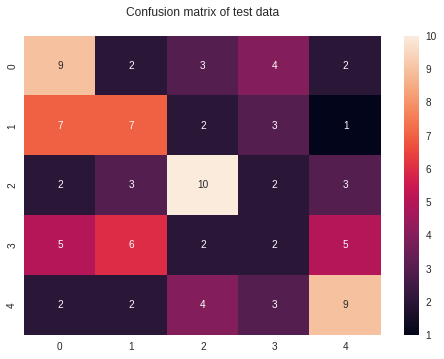

In [ ]:
y_predict_aug = vgg_model_reg.predict(X_test)
y_predictaug = y_predict_aug.argmax(axis=-1)
print(classification_report(Y_test, y_predictaug))
conf_mxaug = confusion_matrix(Y_test, y_predictaug)
print('\n Confusion matrix: \n\n{0}'.format(conf_mxaug))
print('\n')
hm = sns.heatmap(conf_mxreg, annot = True)

hm.set(title = "Confusion matrix of test data\n")

plt.show()

the accuracy is improved with augmentation and reached to 46%

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.98      0.97      0.98       108
           2       0.96      0.92      0.94       108
           3       0.97      0.90      0.93       108
           4       0.86      1.00      0.93       108

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540


 Confusion matrix: 

[[103   2   2   0   1]
 [  0 105   0   0   3]
 [  1   0  99   3   5]
 [  1   0   2  97   8]
 [  0   0   0   0 108]]




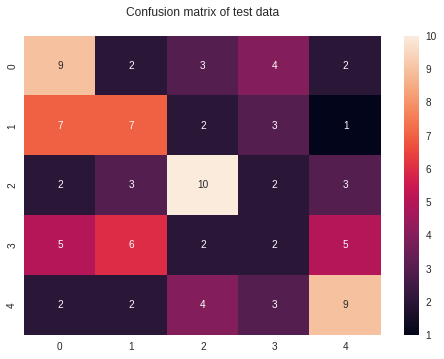

In [ ]:
trainy_predict_aug = vgg_model_reg.predict(trainx)
trainy_predictaug = trainy_predict_aug.argmax(axis=-1)
print(classification_report(trainy, trainy_predictaug))
trainconf_mxaug = confusion_matrix(trainy, trainy_predictaug)
print('\n Confusion matrix: \n\n{0}'.format(trainconf_mxaug))
print('\n')
hm = sns.heatmap(conf_mxreg, annot = True)

hm.set(title = "Confusion matrix of test data\n")

plt.show()

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        72
           1       0.51      0.43      0.47        72
           2       0.44      0.40      0.42        72
           3       0.36      0.28      0.31        72
           4       0.54      0.78      0.64        72

    accuracy                           0.52       360
   macro avg       0.51      0.52      0.51       360
weighted avg       0.51      0.52      0.51       360


 Confusion matrix: 

[[51  7 10  0  4]
 [13 31 14 11  3]
 [ 6 11 29 16 10]
 [ 3 10  9 20 30]
 [ 2  2  4  8 56]]




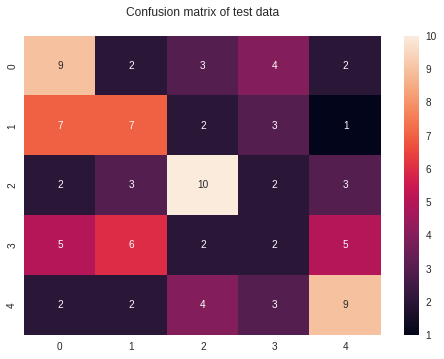

In [ ]:
valy_predict_aug = vgg_model_reg.predict(valx)
valy_predictaug = valy_predict_aug.argmax(axis=-1)
print(classification_report(valy, valy_predictaug))
valconf_mxaug = confusion_matrix(valy, valy_predictaug)
print('\n Confusion matrix: \n\n{0}'.format(valconf_mxaug))
print('\n')
hm = sns.heatmap(conf_mxreg, annot = True)

hm.set(title = "Confusion matrix of test data\n")

plt.show()

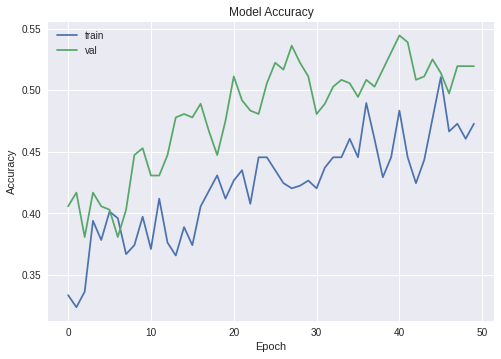

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in modelaug.history :
    k = 'accuracy'    

if 'acc' in modelaug.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(modelaug.history[k])
    plt.plot(modelaug.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


when we increase data the model can fit and the gap between two curves is decrease and the model consider no overfit and if we increase number of epoch the model will more train and give high accuracy.
 

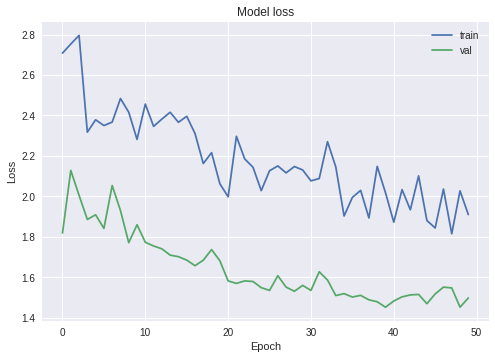

In [ ]:
plt.plot(modelaug.history['loss'])
plt.plot(modelaug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


the loss is decrease but still not reach to the minimun loss but it is still change with more epoch and this is good. 

## 5.1 Discussion

when we use just regularization the model improved but still give overfit 
but when we use augmentation after regularization the model is good improved.

I think because I increase number of training data  set with appling different method to generate new images.the model can detect correctly the patern of the image and improve when I increase number of epoch.

and you can see the comment after each figer.